<a href="https://colab.research.google.com/github/ChiragShetye/Jamboree-Education---Linear-Regression/blob/main/Jamboree_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

In [ ]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
74,75,314,106,3,3.0,5.0,8.90,0,0.74
70,71,332,118,5,5.0,5.0,9.64,1,0.94
417,418,316,103,3,3.5,2.0,7.68,0,0.52
343,344,305,103,2,2.5,3.5,8.13,0,0.59
204,205,298,105,3,3.5,4.0,8.54,0,0.69
25,26,340,120,5,4.5,4.5,9.60,1,0.94
167,168,313,102,3,2.0,3.0,8.27,0,0.64
161,162,298,99,1,1.5,3.0,7.46,0,0.53
299,300,305,112,3,3.0,3.5,8.65,0,0.71
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop('Serial No.', axis=1, inplace=True)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
# 1. Observations on shape of data and data types
print("Data Shape:", df.shape)

Data Shape: (500, 8)


In [ ]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
#Calculating the Measures of Central Tendency
mean = df.mean(axis=0)
median = df.median(axis=0)
mode = df.mode().iloc[0]  # Taking the first mode if there are multiple

print("Mean:\n", mean)
print("----------- Median: -----------\n", median)
print("----------- Mode: -------------\n", mode)

Mean:
 GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64
----------- Median: -----------
 GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.56
Research               1.00
Chance of Admit        0.72
dtype: float64
----------- Mode: -------------
 GRE Score            312.00
TOEFL Score          110.00
University Rating      3.00
SOP                    4.00
LOR                    3.00
CGPA                   8.00
Research               1.00
Chance of Admit        0.71
Name: 0, dtype: float64


In [ ]:
# Standard deviation and IQR calculation
std = df.describe().loc['std']
q1 = df.describe().loc['25%']
q3 = df.describe().loc['75%']
IQR = q3 - q1
min_max = df.describe().loc[['min', 'max']]

print("Standard Deviation:\n", std)
print("----------- IQR: --------------\n", IQR)
print("----------- Max: --------------\n", min)
print("*********** Min: *************\n", max)

Standard Deviation:
 GRE Score            11.295148
TOEFL Score           6.081868
University Rating     1.143512
SOP                   0.991004
LOR                   0.925450
CGPA                  0.604813
Research              0.496884
Chance of Admit       0.141140
Name: std, dtype: float64
----------- IQR: --------------
 GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64
----------- Max: --------------
 <built-in function min>
*********** Min: *************
 <built-in function max>


In [ ]:
# Skewness and Kurtosis calculation
skew = df.skew(axis=0)  # Compute skewness for each column
kurt = pd.DataFrame(df.kurtosis(axis=0), columns=["kurt"])  # Compute kurtosis for each column

print('\n*********** Skewness: *************\n', skew)
print('*********** Kurtosis: *************\n', kurt)


*********** Skewness: *************
 GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64
*********** Kurtosis: *************
                        kurt
GRE Score         -0.711064
TOEFL Score       -0.653245
University Rating -0.810080
SOP               -0.705717
LOR               -0.745749
CGPA              -0.561278
Research          -1.949018
Chance of Admit   -0.454682


In [ ]:
# Calculate the covariance matrix of the DataFrame
covariance_matrix = df.cov()

# Display the covariance matrix
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
                     GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score          127.580377    56.825026           8.206605  6.867206   
TOEFL Score         56.825026    36.989114           4.519150  3.883960   
University Rating    8.206605     4.519150           1.307619  0.825014   
SOP                  6.867206     3.883960           0.825014  0.982088   
LOR                  5.484521     3.048168           0.644112  0.608701   
CGPA                 5.641944     2.981607           0.487761  0.426845   
Research             3.162004     1.411303           0.242645  0.200962   
Chance of Admit      1.291862     0.680046           0.111384  0.095691   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          5.484521  5.641944  3.162004          1.291862  
TOEFL Score        3.048168  2.981607  1.411303          0.680046  
University Rating  0.644112  0.487761  0.242645          0.111384  
SOP                0.608701  0.4

In [ ]:
# Calculate the correlation matrix of the DataFrame
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                    GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0

Univariant Analysis

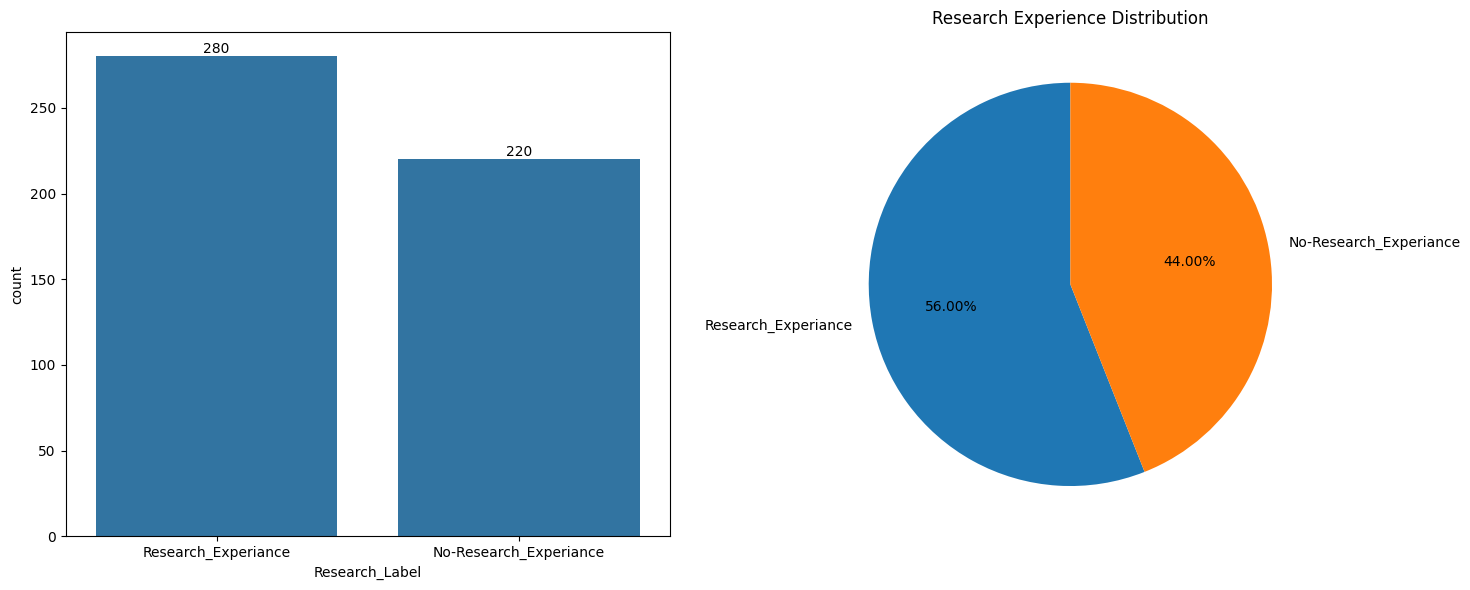

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Replace 0 and 1 with 'No-Research_Experiance' and 'Research_Experiance' in the DataFrame
df['Research_Label'] = df['Research'].replace({0: 'No-Research_Experiance', 1: 'Research_Experiance'})


# Create a figure with a specified size
plt.figure(figsize=(15, 6))


# First subplot: Count plot for Research Experience
plt.subplot(1, 2, 1)
# Count of Research Experience with new labels
research_count = df["Research_Label"].value_counts()
# Count plot with updated labels
ax = sns.countplot(data=df, x="Research_Label")
# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)


# Second subplot: Pie chart for Research Experience
plt.subplot(1, 2, 2)
plt.pie(
    research_count,
    labels=research_count.index,  # New labels: Researcher/Non-Researcher
    startangle=90,
    autopct="%.2f%%"  # Format for percentage display
)
plt.title("Research Experience Distribution")  # Title for the pie chart
# Show the plots
plt.tight_layout()  # Adjusts subplots to fit into the figure area
plt.show()

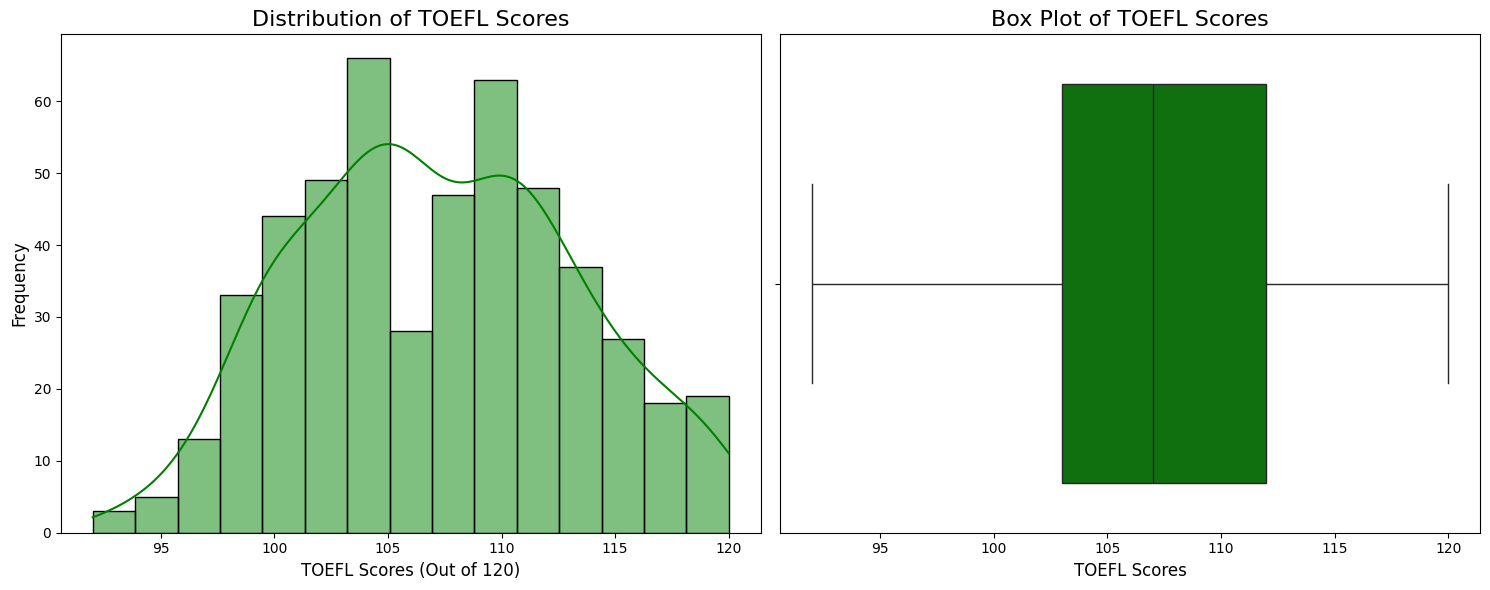

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(15, 6))

# First subplot: Univariate distribution plot for TOEFL Scores (Histogram with KDE)
plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'], kde=True, bins=15, color = 'green')  # KDE curve on histogram

# Set labels and title
plt.title("Distribution of TOEFL Scores", fontsize=16)
plt.xlabel("TOEFL Scores (Out of 120)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Second subplot: Box plot for TOEFL Scores
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="TOEFL Score", color = 'green')

# Set title for the box plot
plt.title("Box Plot of TOEFL Scores", fontsize=16)
plt.xlabel("TOEFL Scores", fontsize=12)

# Adjust layout to fit both plots nicely
plt.tight_layout()

# Show the plots
plt.show()

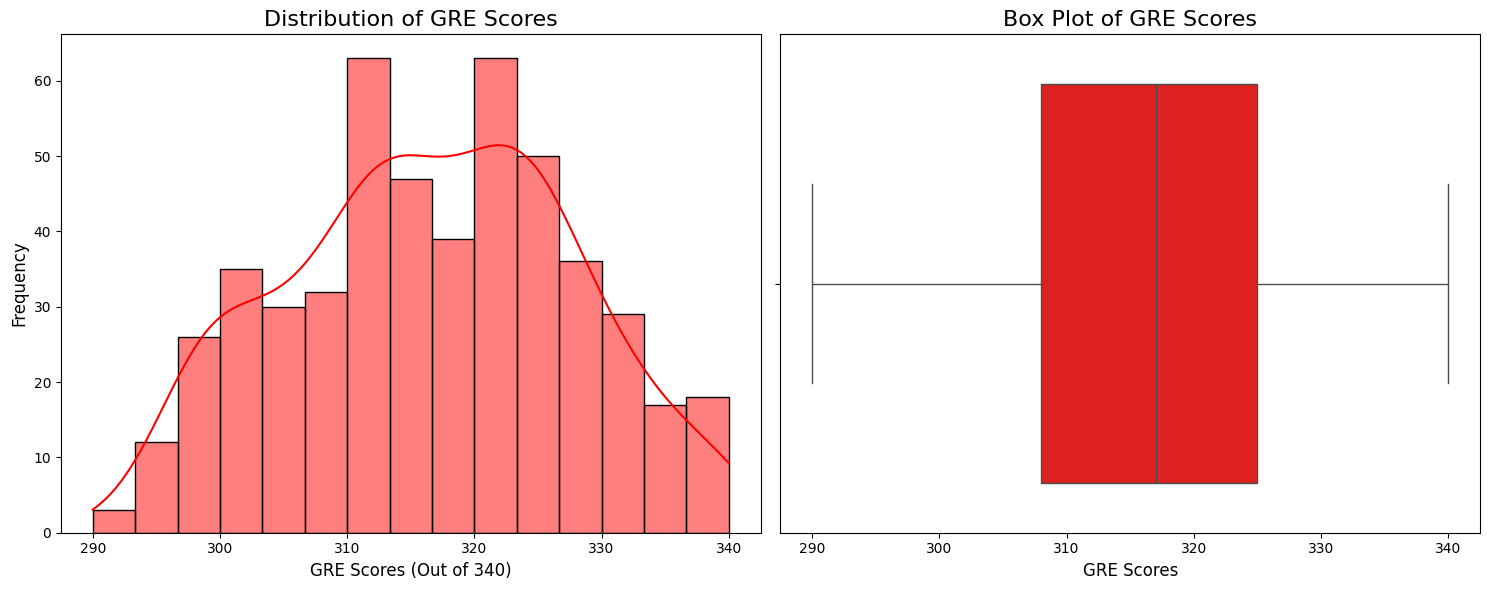

In [ ]:
import matplotlib.pyplot
import seaborn as sns

# Create a figure specific size
plt.figure(figsize=(15,6))

# First subplot: Univariate distribution plot for GRE Scores
plt.subplot(1,2,1)
sns.histplot(df['GRE Score'], kde=True, bins=15, color = 'red')

# Set labels and title
plt.title("Distribution of GRE Scores", fontsize=16)
plt.xlabel("GRE Scores (Out of 340)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Second subplot: Box plot for GRE Scores
plt.subplot(1,2,2)
sns.boxplot(data=df, x="GRE Score", color = 'red')

# Set title for the box plot
plt.title("Box Plot of GRE Scores", fontsize=16)
plt.xlabel("GRE Scores", fontsize=12)

# Adjust layout to fit both plots nicely
plt.tight_layout()

# Show the plots
plt.show()

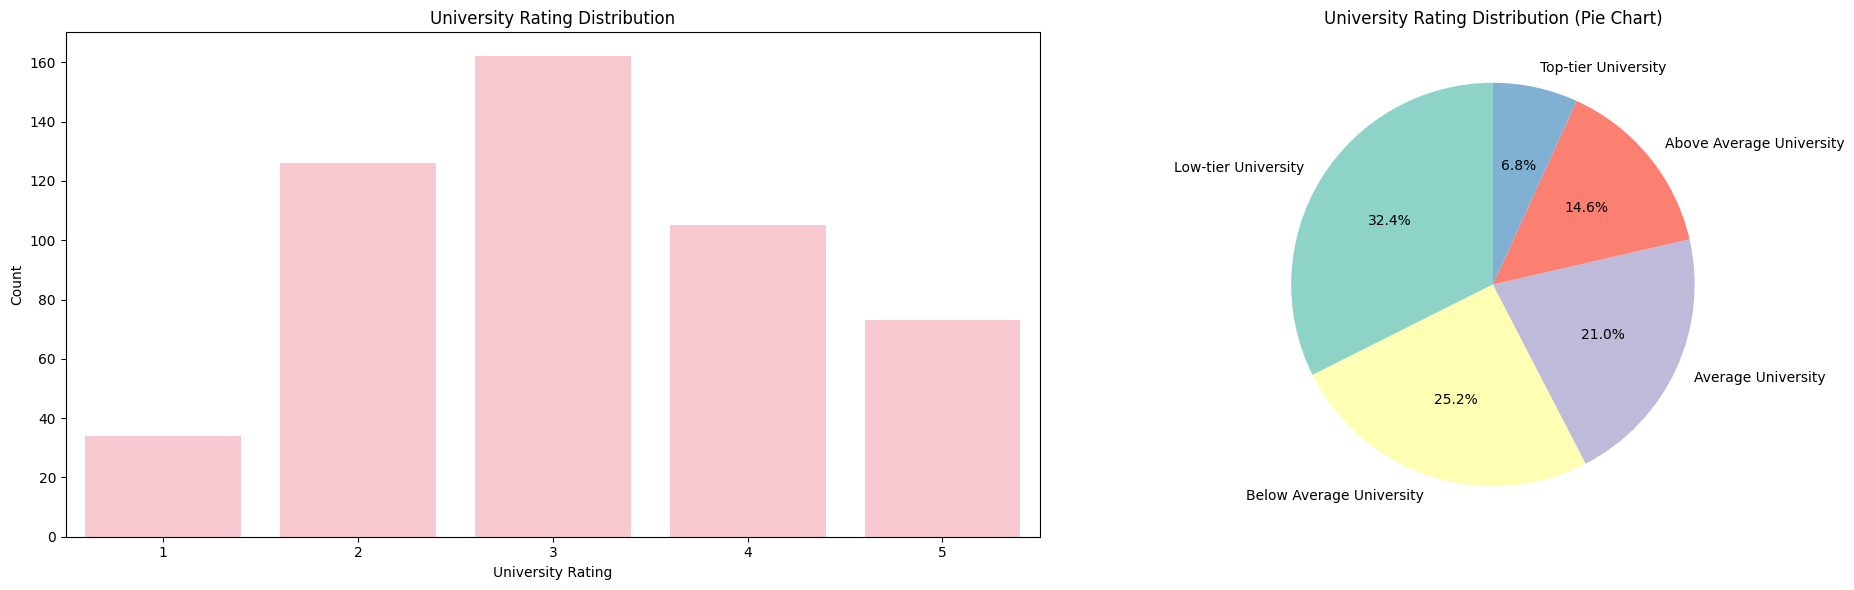

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# First subplot: Univariate distribution plot for University Rating (Count Plot)
plt.subplot(1, 2, 1)
sns.countplot(x='University Rating', data=df,color = 'pink')
plt.title('University Rating Distribution')
plt.xlabel('University Rating')
plt.ylabel('Count')

# Second subplot: Pie chart for University Ratings
plt.subplot(1, 2, 2)
rating_labels = ['Low-tier University', 'Below Average University', 'Average University',
                 'Above Average University', 'Top-tier University']

# Count the occurrences of each University Rating
rating_counts = df['University Rating'].value_counts()

plt.pie(
    rating_counts,
    labels=rating_labels,
    startangle=90,
    autopct='%.1f%%',  # Format for percentage display
    colors=sns.color_palette("Set3")
)

plt.title("University Rating Distribution (Pie Chart)")  # Title for the pie chart

# Adjust layout to fit all plots
plt.tight_layout()

# Show the plots
plt.show()


Multicollinearity

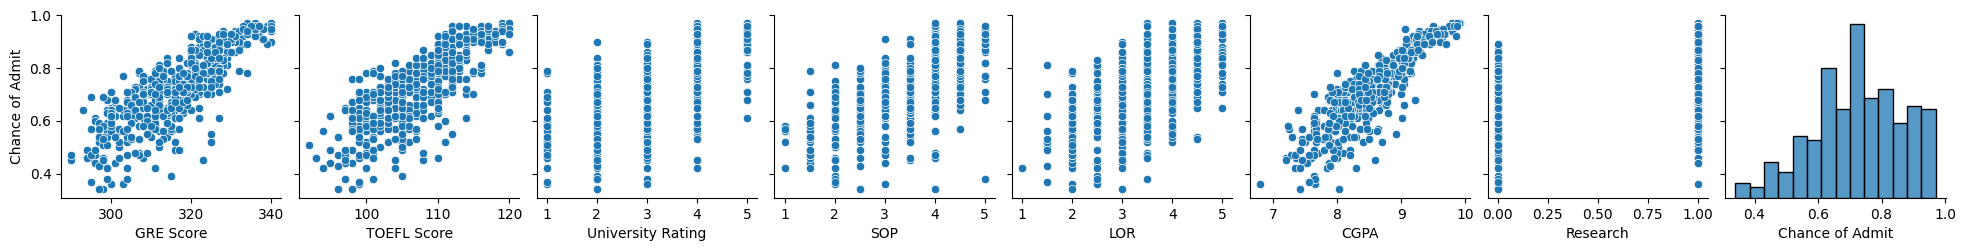

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Create a pairplot with 'Chance of Admit' as the y variable
sns.pairplot(data=df, y_vars=["Chance of Admit"])

# Show the plot
plt.show()

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
Research_Label        object
dtype: object


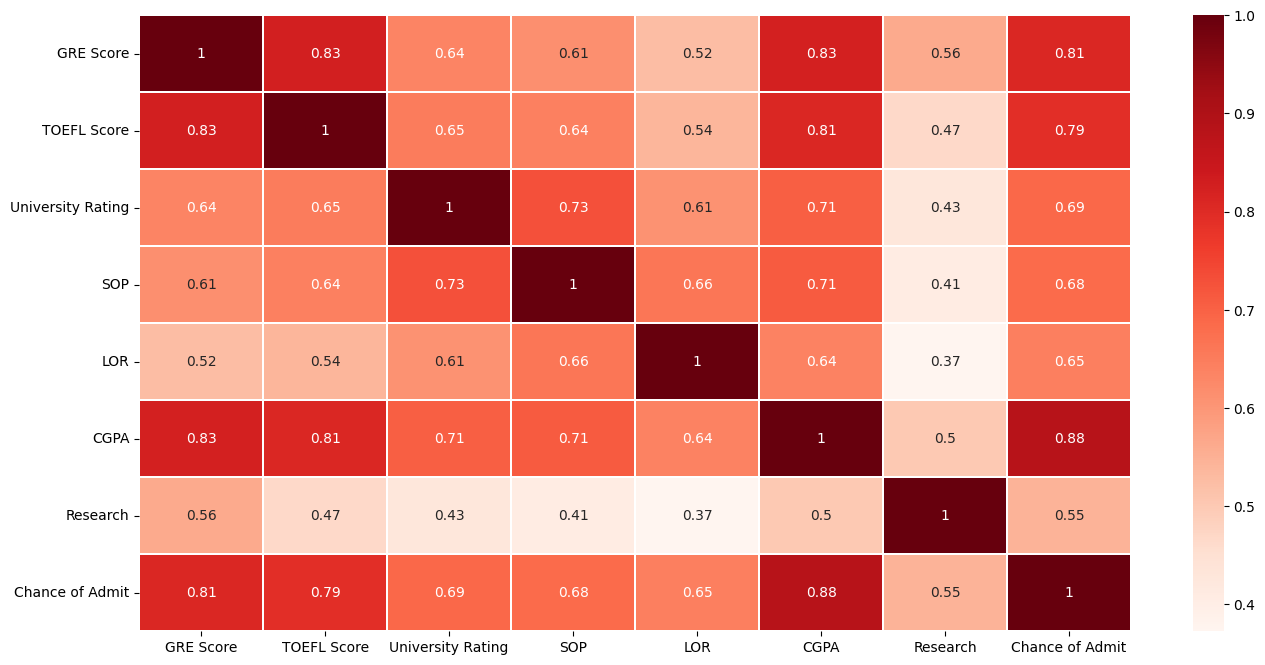

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types in the DataFrame
print(df.dtypes)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Create a figure with a specified size
plt.figure(figsize=(16, 8))

# Generate a heatmap of the correlation matrix for numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='Reds', linewidths=0.1)

# Show the plot
plt.show()

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Research_Label
0,337,118,4,4.5,4.5,9.65,1,0.92,Research_Experiance
1,324,107,4,4.0,4.5,8.87,1,0.76,Research_Experiance
2,316,104,3,3.0,3.5,8.00,1,0.72,Research_Experiance
3,322,110,3,3.5,2.5,8.67,1,0.80,Research_Experiance
4,314,103,2,2.0,3.0,8.21,0,0.65,No-Research_Experiance
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,Research_Experiance
496,337,117,5,5.0,5.0,9.87,1,0.96,Research_Experiance
497,330,120,5,4.5,5.0,9.56,1,0.93,Research_Experiance
498,312,103,4,4.0,5.0,8.43,0,0.73,No-Research_Experiance


In [ ]:
df = df.drop('Research_Label', axis=1)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
x = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on training data
x_test_scaled = scaler.transform(x_test)  # Transform on test data

# Display the shapes of the resulting datasets
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Optionally, display the first few rows of the scaled training data
print("Scaled Training Features (first 5 rows):")
print(x_train_scaled[:5])

x_train shape: (400, 7), x_test shape: (100, 7)
y_train shape: (400,), y_test shape: (100,)
Scaled Training Features (first 5 rows):
[[ 0.38998634  0.6024183  -0.09829757  0.12679578  0.56498381  0.4150183
   0.89543386]
 [-0.06640493  0.6024183   0.7754586   0.63397891  1.65149114 -0.06785154
  -1.11677706]
 [-1.25302222 -0.87691722 -0.09829757  0.12679578 -0.52152352 -0.13445427
  -1.11677706]
 [-0.24896144 -0.05506416 -0.97205374 -0.88757048  0.56498381 -0.51742001
  -1.11677706]
 [-0.79663095 -0.21943477 -0.09829757  0.12679578 -1.06477718 -0.61732412
   0.89543386]]


In [ ]:
# Create DataFrames with appropriate column names
X_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
X_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
395,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
396,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
397,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
398,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Calculating the coefficients
lr_model.coef_

array([0.02667052, 0.01822633, 0.00293995, 0.001788  , 0.0158655 ,
       0.06758106, 0.01194049])

In [ ]:
# Calculating the intercept
lr_model.intercept_

0.7241749999999999

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [ ]:
# Calculating the R2 Value on train Data
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print("R2 Score:", r2)
lr = lr_model.score(X_train,  y_train)
print("LR Score:", lr)

R2 Score: 0.8210671369321554
LR Score: 0.8210671369321554


In [ ]:
# Calculating the R2 Value on the Test Data
r2_test = r2_score(y_test, y_pred_test)
print("R2 Score:", r2_test)
lr_test = lr_model.score(X_test,  y_test)
print("LR Score:", lr_test)

R2 Score: 0.8188432567829627
LR Score: 0.8188432567829627


In [ ]:
# Create a DataFrame for the model weights (coefficients) and intercept
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1, -1), columns=X_train.columns)  # Use the correct feature names from X_train
lr_model_weights["Intercept"] = lr_model.intercept_  # Add the intercept

# Display the weights and intercept
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026671,0.018226,0.00294,0.001788,0.015866,0.067581,0.01194,0.724175


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)  # Number of observations
    if len(model.coef_.shape) == 1:
        p = len(model.coef_)  # Number of predictors
    else:
        p = len(model.coef_[0])  # Number of predictors in case of multi-output

    # Calculating the errors
    MSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=True), 2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast), 2)
    RMSE = np.round(mean_squared_error(y_true=y_actual, y_pred=y_forecast, squared=False), 2)

    # Calculating R2 and Adjusted R2
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast), 2)
    adj_r2 = np.round(1 - ((1 - r2) * (n - 1) / (n - p - 1)), 2)

    # Return the results
    return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [ ]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [ ]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Linear Regression Using OLS


In [ ]:
  # Add a constant (intercept) to the training data
  new_x_train = sm.add_constant(x_train)

  # Build the OLS model
  model = sm.OLS(y_train, new_x_train)

  # Fit the model
  results = model.fit()

  # Print the statistical summary of the model
  print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          3.41e-142
Time:                        11:53:59   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.12

In [ ]:
X_train_new = new_x_train.drop('SOP', axis=1)

In [ ]:
model2 = sm.OLS(y_train, X_train_new)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          2.01e-143
Time:                        11:53:59   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4272      0.12

Asumption of Linear Regression:




In [ ]:
#No Multicollinearity

vif = pd.DataFrame()
vif['Variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.654540
0,GRE Score,4.489983
1,TOEFL Score,3.664298
3,SOP,2.785764
2,University Rating,2.572110
4,LOR,1.977698
6,Research,1.518065


In [ ]:
# Calculate residuals
residual = y_test.values - y_pred_test

# Display residuals
print("Residuals:\n", residual)

Residuals:
 [ 0.01542527  0.04481873 -0.18265986  0.06263032 -0.07588282  0.02793439
 -0.00459746 -0.07850923 -0.14378728  0.01258502 -0.27193204  0.04410882
 -0.04632227  0.00322832  0.0658482  -0.01979177  0.03068058  0.05272705
  0.00660424 -0.00155958  0.00451832 -0.01305833 -0.04232308 -0.00506004
 -0.04027648  0.07751346 -0.01840363 -0.02741471  0.01222989 -0.01343096
  0.03466965 -0.01004034 -0.01474225  0.02883712  0.06286984 -0.0271816
  0.05576161 -0.01718977  0.03635733 -0.15057279 -0.01036982 -0.13495143
  0.02924609  0.03169578 -0.04112903  0.06206238 -0.0383926   0.00097235
 -0.03591651  0.01429352  0.04194031  0.11633762  0.06640289  0.01341071
 -0.0136427   0.04253186  0.00399604 -0.10916386  0.02743018 -0.0612903
  0.05049241  0.01968812  0.02103279  0.11796194  0.01914132 -0.10866369
  0.0232453  -0.03783006  0.04168193  0.00332608  0.0223182   0.00412279
  0.00847434  0.01728981  0.0257047  -0.03084583 -0.01627224 -0.08373777
  0.05270426 -0.09142139  0.03041964  0.0

In [ ]:
# Calculate residuals for the training set
residual_train = y_train.values - y_pred_train

# Calculate and display the mean of the residuals
mean_residual_train = residual_train.mean()
print("Mean Residuals for Training Set:", mean_residual_train)

Mean Residuals for Training Set: 1.4419021532319221e-16


In [ ]:
# Calculate residuals for the testing set
residual_test = y_test.values - y_pred_test

# Calculate and display the mean of the residuals for the testing set
mean_residual_test = residual_test.mean()
print("Mean Residuals for Testing Set:", mean_residual_test)

Mean Residuals for Testing Set: -0.005453623717661251


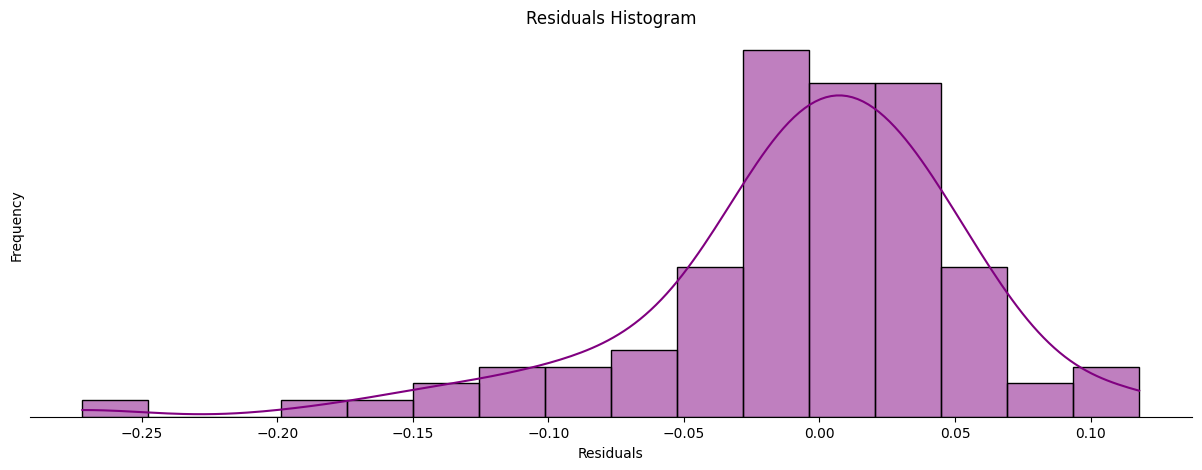

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the histogram of residuals with a Kernel Density Estimate (KDE)
sns.histplot(residual, kde=True, color='purple')

# Add titles and labels
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Remove the left spine and hide y-ticks for a cleaner look
sns.despine(left=True)
plt.yticks([])  # Hides y-ticks

# Show the plot
plt.show()

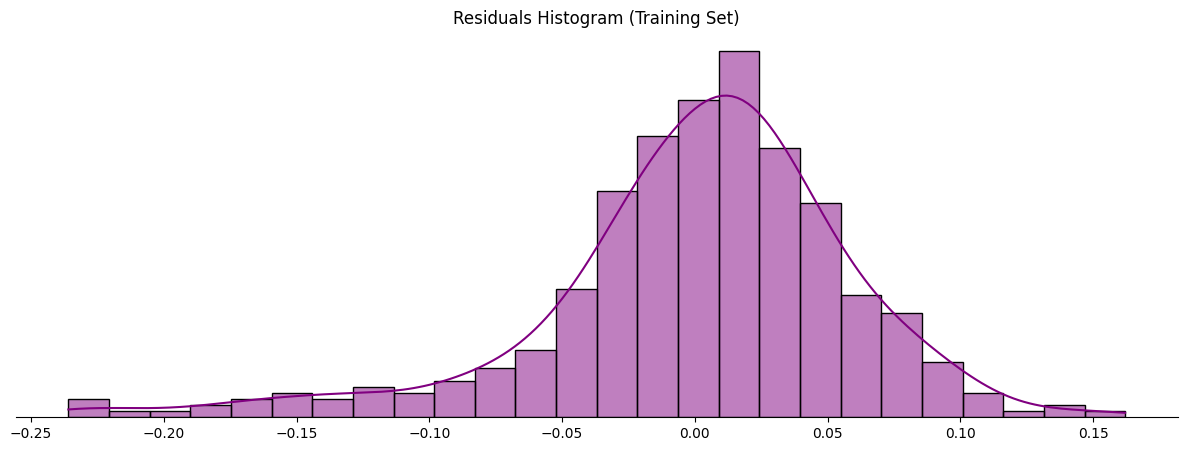

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Plot the histogram of training residuals with a Kernel Density Estimate (KDE)
sns.histplot(residual_train, kde=True, color='purple')  # Color set to red

# Add a title to the plot
plt.title('Residuals Histogram (Training Set)')

# Remove the left spine for a cleaner look
sns.despine(left=True)

# Hide the y-axis label and ticks
plt.ylabel("")
plt.yticks([])

# Show the plot
plt.show()

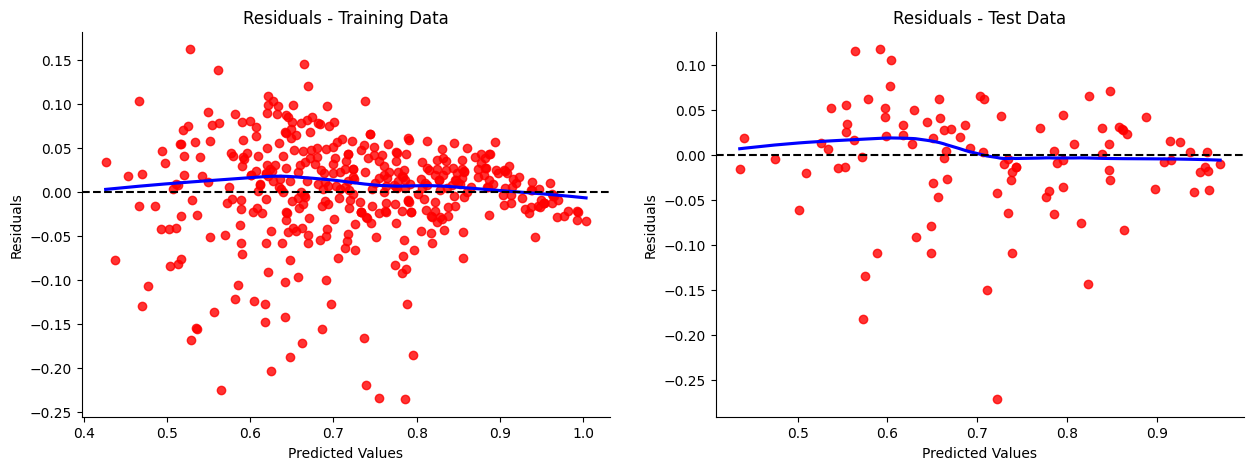

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 5))

# First subplot: Residuals for training data
plt.subplot(121)
plt.title('Residuals - Training Data')  # Title for the training residuals plot
sns.regplot(x=y_pred_train, y=residual_train, lowess=True, color='r', line_kws={'color': 'blue'})  # Scatter plot with LOWESS line
plt.axhline(y=0, color='k', linestyle='--')  # Horizontal line at y=0 for reference
plt.xlabel('Predicted Values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label

# Second subplot: Residuals for test data
plt.subplot(122)
plt.title('Residuals - Test Data')  # Title for the test residuals plot
sns.regplot(x=y_pred_test, y=residual, lowess=True, color='r', line_kws={'color': 'blue'})  # Scatter plot with LOWESS line
plt.axhline(y=0, color='k', linestyle='--')  # Horizontal line at y=0 for reference
plt.xlabel('Predicted Values')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label

# Remove spines for cleaner look
sns.despine()

# Show the plots
plt.show()

In [ ]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

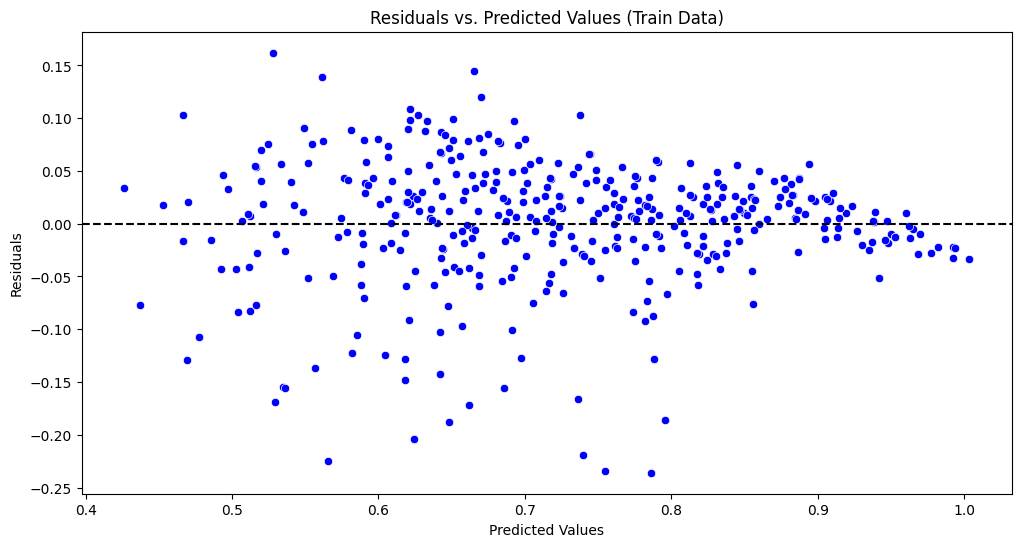

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_train and residual_train are already defined
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values Plot
sns.scatterplot(x=y_pred_train, y=residual_train, color='blue')
plt.axhline(y=0, color='k', linestyle='--')  # Horizontal line at y=0
plt.title('Residuals vs. Predicted Values (Train Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming you have already fitted your OLS model
new_x_train = sm.add_constant(x_train)  # Add constant to the model
model = sm.OLS(y_train, new_x_train).fit()  # Fit the model

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Results of the test
bp_lm = bp_test[0]  # Lagrange multiplier statistic
bp_pvalue = bp_test[1]  # p-value

if bp_pvalue < 0.05:
    print("Reject the null hypothesis: Heteroscedasticity exists.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")

print(f'Breusch-Pagan Test statistic: {bp_lm:.4f}, p-value: {bp_pvalue:.4f}')

Reject the null hypothesis: Heteroscedasticity exists.
Breusch-Pagan Test statistic: 25.1559, p-value: 0.0007


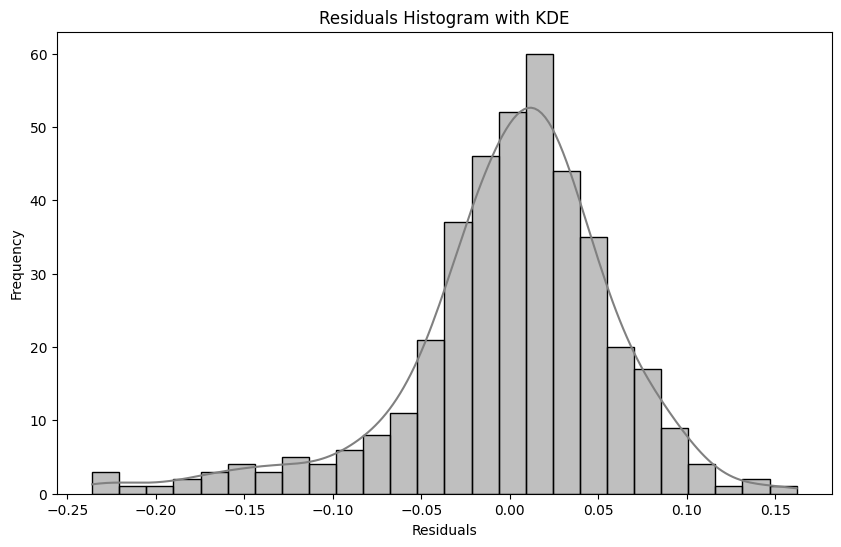

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming residual_train or residual is the residuals array
plt.figure(figsize=(10, 6))
sns.histplot(residual_train, kde=True, color='grey')
plt.title('Residuals Histogram with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

<Figure size 1500x500 with 0 Axes>

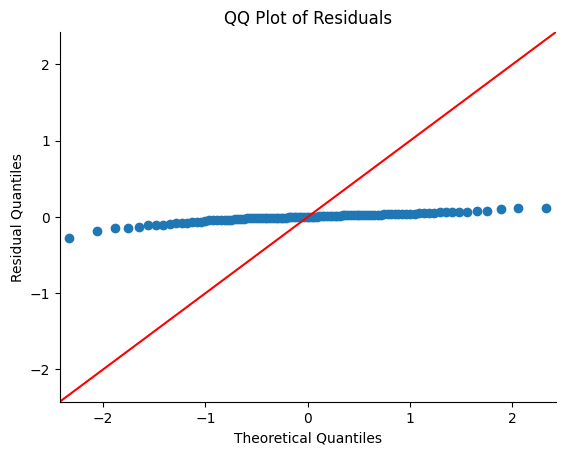

In [ ]:
plt.figure(figsize=(15,5))
sm.qqplot(residual,line='45')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show()

In [ ]:
from scipy.stats import anderson

# Anderson-Darling Test for normality
ad_test = anderson(residual_train, dist='norm')

# Output the test statistic
print('Anderson-Darling Test Statistic: %.4f' % ad_test.statistic)

# Critical values at different significance levels
for i, critical_value in enumerate(ad_test.critical_values):
    significance_level = ad_test.significance_level[i]
    print(f"Critical value at {significance_level}%: {critical_value}")

# Interpretation based on comparison
for i, critical_value in enumerate(ad_test.critical_values):
    if ad_test.statistic > critical_value:
        print(f"At {ad_test.significance_level[i]}% significance level, we reject the null hypothesis of normality.")
    else:
        print(f"At {ad_test.significance_level[i]}% significance level, we fail to reject the null hypothesis of normality.")

Anderson-Darling Test Statistic: 7.3573
Critical value at 15.0%: 0.57
Critical value at 10.0%: 0.65
Critical value at 5.0%: 0.779
Critical value at 2.5%: 0.909
Critical value at 1.0%: 1.081
At 15.0% significance level, we reject the null hypothesis of normality.
At 10.0% significance level, we reject the null hypothesis of normality.
At 5.0% significance level, we reject the null hypothesis of normality.
At 2.5% significance level, we reject the null hypothesis of normality.
At 1.0% significance level, we reject the null hypothesis of normality.


In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with alpha = 0.45
model_lasso = Lasso(alpha=0.45)

# Fit the model on the training data
model_lasso.fit(x_train, y_train)

# Retrieve the coefficients and intercept
lasso_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1), columns=x_train.columns)
lasso_weights["Intercept"] = model_lasso.intercept_

# Display the weights
lasso_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.006765,0.0,0.0,0.0,0.0,0.0,0.0,-1.418501


In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
model_ridge = Ridge()

# Fit the model to the training data
model_ridge.fit(x_train, y_train)

# Retrieve the coefficients and intercept
ridge_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1), columns=x_train.columns)
ridge_weights["Intercept"] = model_ridge.intercept_

# Display the weights
ridge_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.002521,0.003073,0.002767,0.002164,0.017478,0.109079,0.023679,-1.430098


In [ ]:
# Generate predictions for the Ridge model
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

# Generate predictions for the Lasso model
y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [ ]:
print("Ridge Model:")
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge)
print("\nLasso Model:")
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso)

Ridge Model:
MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82

Lasso Model:
MSE: 0.01
MAE: 0.07
RMSE: 0.09
R2 Score: 0.59
Adjusted R2: 0.58
